In [4]:
import pandas as pd
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("encoded_car_data.csv")
df

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,109.1,2952.0,141.0,3.78,114.0,188.8,68.9,23.0,28.0,16845.0
201,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,109.1,3049.0,141.0,3.78,160.0,188.8,68.8,19.0,25.0,19045.0
202,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,109.1,3012.0,173.0,3.58,134.0,188.8,68.9,18.0,23.0,21485.0
203,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,109.1,3217.0,145.0,3.01,106.0,188.8,68.9,26.0,27.0,22470.0


In [6]:
X = df[['enginesize','horsepower','citympg','highwaympg']]
y = df['price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
linear_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model',LinearRegression())
])
linear_model.fit(X_train,y_train)
y_pred_linear = linear_model.predict(X_test)

In [10]:
poly_model = Pipeline([
    ('Poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('model',LinearRegression())
])
poly_model.fit(X_train,y_train)
y_pred_poly = poly_model.predict(X_test)

In [12]:
print("Linear Regression:")
print (f"MSE: {mean_squared_error (y_test, y_pred_linear):.2f}") 
print(f"R2 : {r2_score(y_test, y_pred_linear):.2f}")


Linear Regression:
MSE: 16471505.90
R2 : 0.79


In [14]:
print("Polynomial Regression:")
print (f"MSE: {mean_squared_error (y_test, y_pred_poly):.2f}") 
print(f"R2 : {r2_score(y_test, y_pred_poly):.2f}")

Polynomial Regression:
MSE: 15247661.89
R2 : 0.81


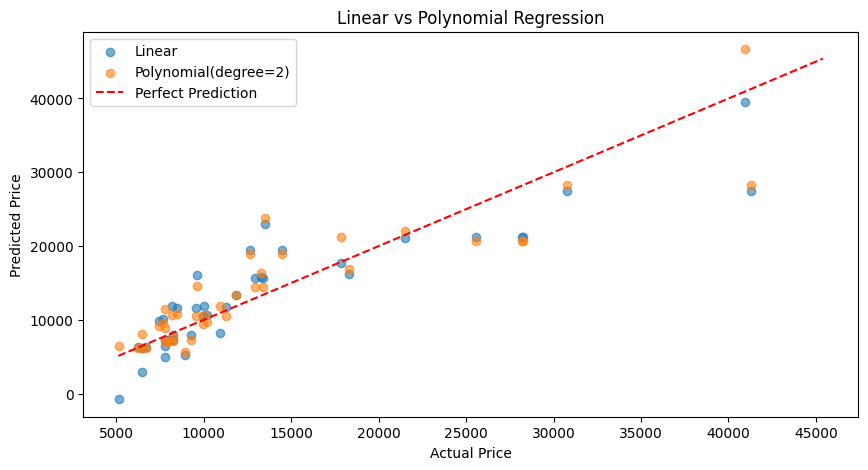

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, label='Linear', alpha=0.6) 
plt.scatter(y_test, y_pred_poly, label='Polynomial(degree=2)', alpha=0.6) 
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction' )
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear vs Polynomial Regression" )
plt.legend()
plt.show()